# Business Case : Appoitment Allocation of Doctors

This case study focuses on strategic analysis of Evening Clinic (After 17:30) Telephone Visits of the Patients from six months of Health-care Data.
- From this case study we are mainly focusing on exploring the number of Physicians required in order to optimize the allocations.
- Further, we are trying to draw few insights from the data in order to enhance the overall Effectiveness of the Program.

In [1]:
import pandas as pd
import numpy as np
import datetime
from datetime import timedelta


import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns


import warnings
# Ignore all warnings
warnings.filterwarnings("ignore")

In [2]:
data=pd.read_excel('Appointment Data.xlsx') # Reading the file into Excel

In [3]:
# Examing the data 
data 

,FACILITY,DEPARTMENT,PROVIDER_ID,APPOINTMENT_DATE,APPOINTMENT_TIME,PATIENT_ID,APPOINTMENT_TYPE,BOOKING_DATE,BOOKING_TIME,SHOW_CODE,CHECKIN_DATE,CHECKIN_TIME
0,SCH,MED,1571160,2010-03-31,11:35:00,126,In-Person Visit,2010-03-31,09:37:00,Y,2010-03-31,12:18:00
1,SCH,MED,1571160,2010-05-13,13:50:00,126,In-Person Visit,2010-05-10,11:00:00,Y,2010-05-13,13:31:00
2,SCH,MED,28685352,2010-03-29,10:30:00,126,In-Person Visit,2010-03-29,09:26:00,Y,2010-03-29,10:35:00
3,SCH,MED,39560883,2010-01-21,11:40:00,605,In-Person Visit,2010-01-15,13:31:00,Y,2010-01-21,11:46:00
4,SCH,MED,4621300,2010-02-02,13:30:00,687,Telephone Visit,2010-02-02,10:20:00,N,NaT,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
125048,SCH,MED,32396433,2010-02-23,14:10:00,99991329,In-Person Visit,2010-02-22,16:21:00,N,NaT,NaN
125049,SCH,MED,32396433,2010-03-01,14:30:00,99991329,In-Person Visit,2010-02-24,13:22:00,N,NaT,NaN
125050,SCH,MED,32396433,2010-03-03,08:20:00,99991329,In-Person Visit,2010-03-01,15:23:00,Y,2010-03-03,08:31:00
125051,SCH,MED,7955370,2010-03-15,10:00:00,99991368,In-Person Visit,2010-02-19,14:52:00,Y,2010-03-15,09:50:00


In [4]:
data['APPOINTMENT_TIME'] = pd.to_datetime(data['APPOINTMENT_DATE'].astype(str) + ' ' + data['APPOINTMENT_TIME'].astype(str))

Plotting the overall compaision of Telephone visits with In-person visits using PlotLy Library

In [5]:
appointment_type_counts = data['APPOINTMENT_TYPE'].value_counts()

# Creating a Pie Chart
fig = px.pie(appointment_type_counts, 
             values=appointment_type_counts.values, 
             names=appointment_type_counts.index, 
             title='Distribution of Appointment Types',
             hole=0.4)

# Adding count annotations with bold text
fig.update_traces(textinfo='label+percent', pull=[0.1, 0], textfont_size=12)

# Updating layout for the figure size
fig.update_layout(height=400, width=400)

# Showing the plot
fig.show()

Further lets check the distribution of how the Telephone visist are based on time (Before and after 17:30)

In [6]:
telephone_df = data[data['APPOINTMENT_TYPE'] == 'Telephone Visit']

# Create a new column for Time_Category
telephone_df['Time_Category'] = telephone_df['APPOINTMENT_TIME'].apply(lambda x: 'After 17:30' if x.time() > pd.to_datetime('17:30').time() else 'Before 17:30')

# Count Telephone Visits for each Time_Category
time_category_counts = telephone_df['Time_Category'].value_counts().reset_index()
time_category_counts.columns = ['Time_Category', 'Count']

# Define colors for the pie chart
colors = ['#2ecc71', '#e74c3c']

# Create the pie chart with Plotly
fig = px.pie(time_category_counts, values='Count', names='Time_Category',
             title="Distribution of Telephone Visits by Time Category",
             hole=0.3, labels={'Count': 'Number of Visits', 'Time_Category': 'Time Category'},
             color_discrete_sequence=colors)

# Highlight the 'After 17:30' segment
fig.update_traces(pull=[0, 0.1],textfont_size=16)

# Customizing the layout and add annotations
fig.update_layout(
    legend_title='Time Category',
    legend=dict(title='', x=1, y=1,font=dict(size=14)),
    title=dict(text="Distribution of Telephone Visits by Time Category", font=dict(size=18)),
    width=500,
    height=500
)

fig.show()

From these it is apparent that only 4075 are registered to be Telephone visits and rest all are In-Person Visits

## Case 1: Physicians Required

In [7]:
# Filtering the data based on 'Telephone Visits' and after hours (17:30)
final_apt=data[(data['APPOINTMENT_TYPE'] == 'Telephone Visit') & (data['APPOINTMENT_TIME'].dt.time > pd.to_datetime('17:30').time())]

After filtering the data, we would be now exploring the maximum and average physcians needed per day in order to handle the appoitments .

#### STEPS:
1. For this we would be first grouping the 'APPOINTMENT_TIME' by dates.
2. Then we would e finding a day where appointment count was maximum
3. Based on this we would be finding the physician required

In [8]:
#Grouping the dates 
appointment_counts_by_date = final_apt.groupby(final_apt['APPOINTMENT_TIME'].dt.date).size()

#Maximum appoitments per day

max_appointments_on_single_day = appointment_counts_by_date.max()

#Calculating Physicians Needed
physicians_needed_max = np.ceil(max_appointments_on_single_day / 4)

In [9]:
 # Printing maximum Physicians required
print(f"Maximum Physicians required considering appointments is {physicians_needed_max}")

Maximum Physicians required considering appointments is 9.0


For average we will make one change where instead of maximum we would be calculating the mean

In [10]:
average_appointments_per_day = appointment_counts_by_date.mean()
#Step2
physicians_needed_avg = np.ceil(average_appointments_per_day / 4)

In [11]:
 # Printing average Physicians required
print(f"Average Physicians required considering appointments is {physicians_needed_avg}")

Average Physicians required considering appointments is 6.0


Plotting this using PlotLy Library

In [12]:
import plotly.graph_objects as go

color_scale = ['rgb(0, 102, 204)', 'rgb(255, 153, 51)']  # Blue to orange gradient

# Create a bar chart using Plotly
fig = go.Figure()

# Add bar for maximum physicians needed
fig.add_trace(go.Bar(
    x=['Max'],
    y=[physicians_needed_max],
    text=[physicians_needed_max],  # Display value on top of the bar
    name='Max Physicians Needed',
    marker=dict(color=color_scale[0])
))

# Add bar for average physicians needed
fig.add_trace(go.Bar(
    x=['Avg'],
    y=[physicians_needed_avg],
    text=[physicians_needed_avg],  # Display value on top of the bar
    name='Avg Physicians Needed',
    marker=dict(color=color_scale[1])
))

# Update layout for better presentation
fig.update_layout(
    title='Comparison of Maximum and Average Physicians Needed',
    xaxis_title='Max Vs Average ',
    yaxis_title='Number of Physicians per day',
    barmode='group',  # Display bars side by side
    height=400,
    width=600
)

# Show the plot
fig.show()

Hence we can conclude that considering only appointments , we see that we only require around maximum of 9 physicians and avergae of 6 on a any given day

On further analysis , we can reduce the cost and hence optimise the allocation by dividing the data into time slots and counting the number of apponments for each slot that particular day

## Case1 : Optimisation of Cost

Now lets divide the final_apt dataframe to suit out analysis as follows:

In [13]:
final_apt['Hour'] = final_apt['APPOINTMENT_TIME'].dt.hour
final_apt['Date'] = final_apt['APPOINTMENT_TIME'].dt.date

# Create a new column to represent the slot in a day
final_apt['Slot'] = pd.cut(final_apt['Hour'],
                           bins=[17, 18, 19, 20, 21],
                           labels=['17:30-18:30', '18:30-19:30', '19:30-20:30', '20:30-21:30'],
                           right=False)

# Group by date and slot, then count the total appointments for each group
appointment_counts_by_date_slot = final_apt.groupby(['Date', 'Slot']).size().reset_index(name='TotalAppointments')

In [14]:
appointment_counts_pivoted = appointment_counts_by_date_slot.pivot_table(index='Date', columns='Slot', values='TotalAppointments', fill_value=0).reset_index()

In [15]:
#Setting index to the date
appointment_counts_pivoted.set_index('Date', inplace=True)

In [16]:
appointment_counts_pivoted.index

Index([2009-12-01, 2009-12-02, 2009-12-03, 2009-12-04, 2009-12-05, 2009-12-06,
       2009-12-07, 2009-12-08, 2009-12-09, 2009-12-10,
       ...
       2010-06-02, 2010-06-03, 2010-06-04, 2010-06-05, 2010-06-06, 2010-06-07,
       2010-06-08, 2010-06-09, 2010-06-10, 2010-06-11],
      dtype='object', name='Date', length=193)

There are 193 days which almost covers around 6 months of data.

Displaying the maximum of appointment for each slot bu using matplotlib

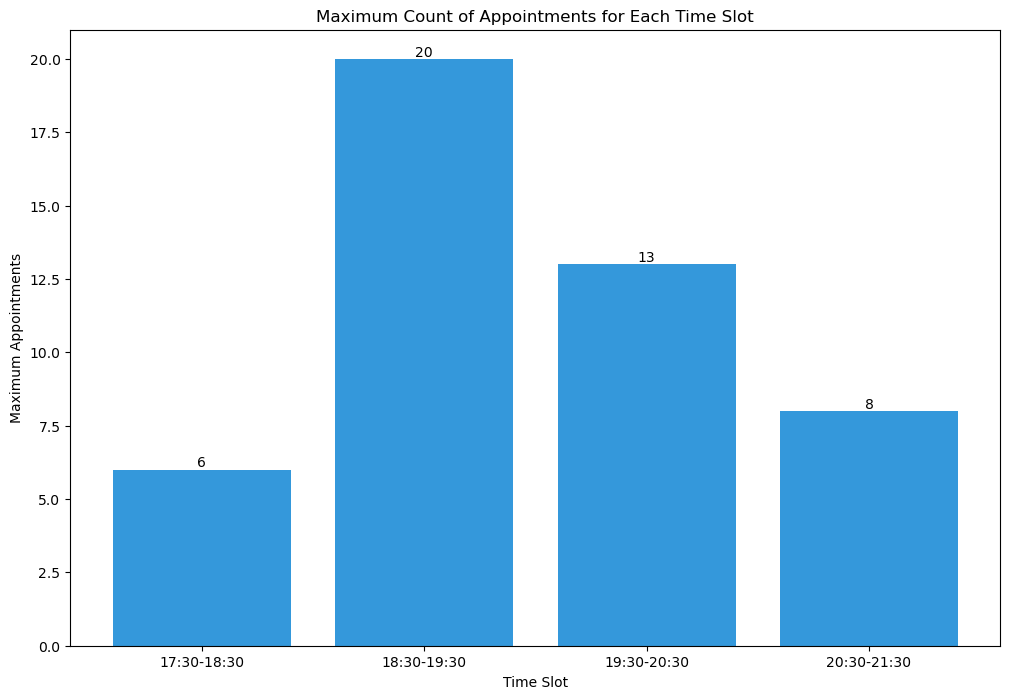

In [17]:
max_appointments_per_slot = appointment_counts_pivoted.max()

plt.figure(figsize=(12, 8))
bars = plt.bar(max_appointments_per_slot.index, max_appointments_per_slot, color='#3498db')  # Use a professional blue color

# Display the number on the bars
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval, round(yval, 2), ha='center', va='bottom')

plt.title('Maximum Count of Appointments for Each Time Slot')
plt.xlabel('Time Slot')
plt.ylabel('Maximum Appointments')
plt.xticks(rotation=0)  # Rotate x-axis labels horizontally
plt.show()

In [18]:
appointment_counts_pivoted['Date'] = pd.to_datetime(appointment_counts_pivoted.index)
appointment_counts_pivoted['Weekday'] = appointment_counts_pivoted['Date'].dt.day_name()

# Group by 'Weekday' and get the maximum values for each slot
max_appointments_by_day = appointment_counts_pivoted.groupby('Weekday').max().iloc[:, 0:]




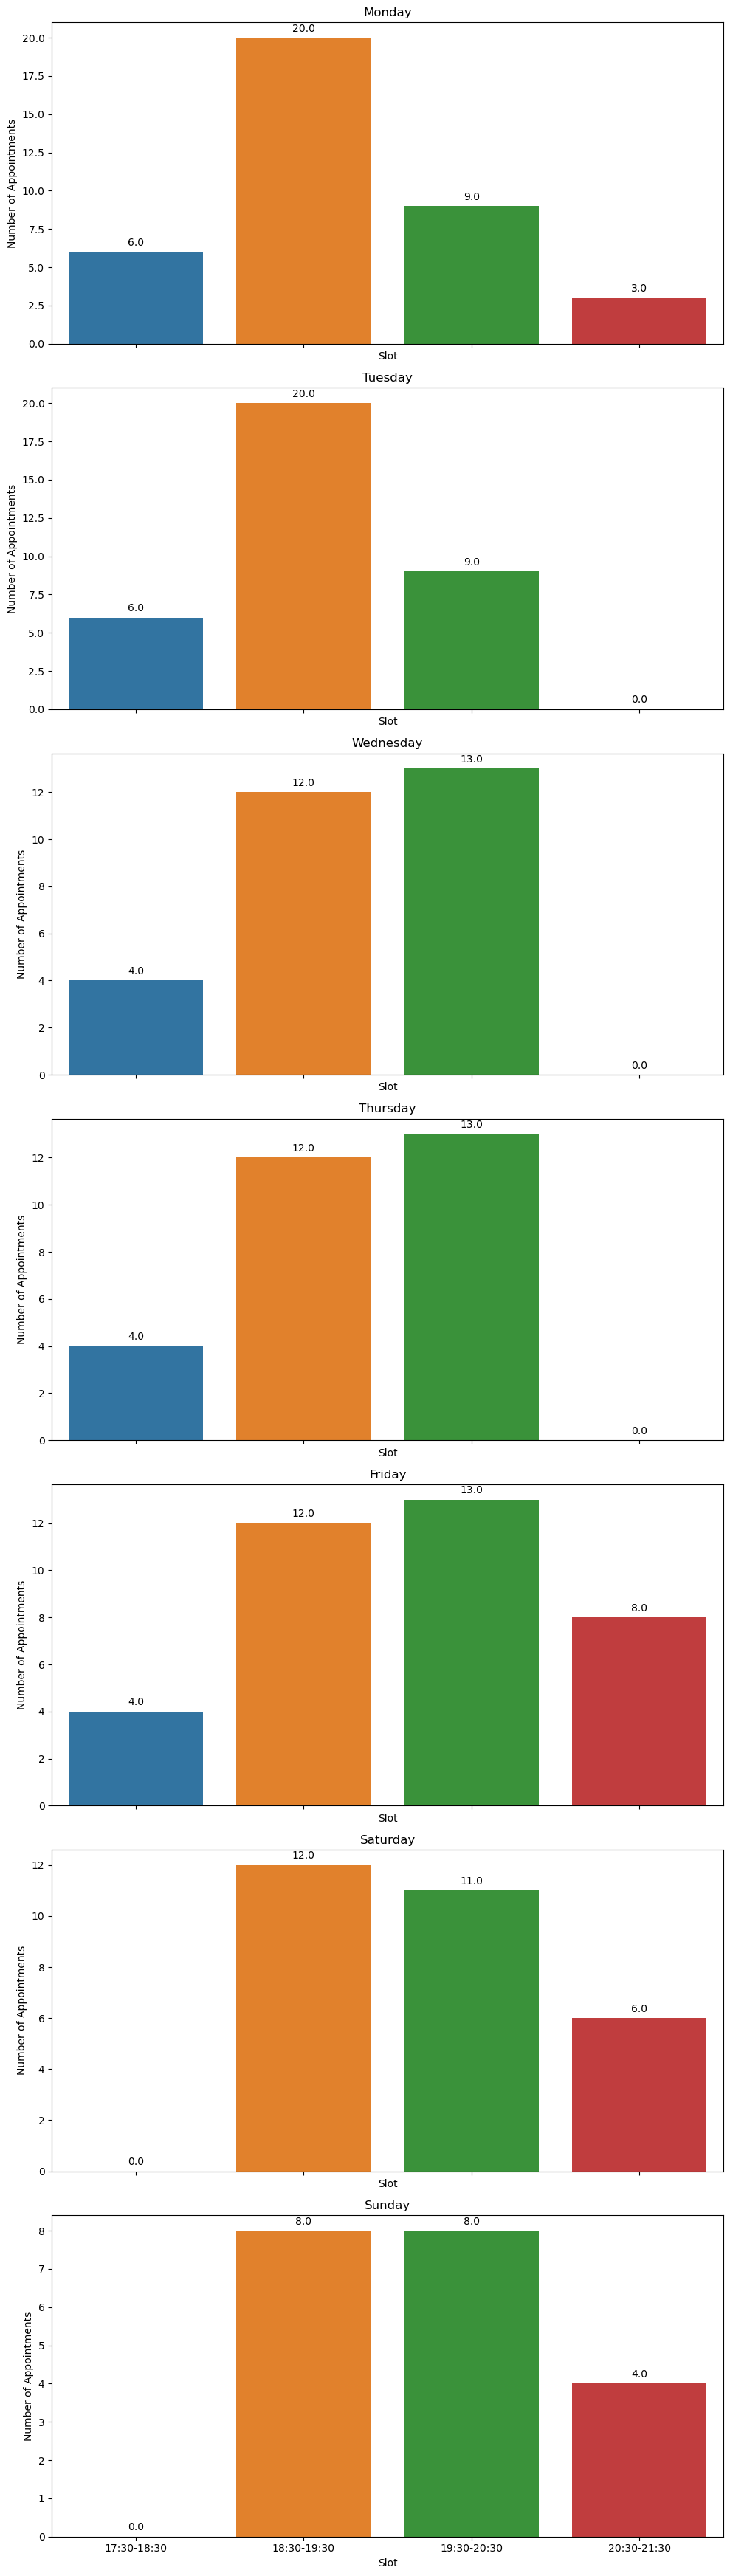

In [19]:
max_appointments_by_day_reset = max_appointments_by_day.reset_index()

# Sort the DataFrame to start with Monday
ordered_days = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]
max_appointments_by_day_ordered = max_appointments_by_day_reset.set_index('Weekday').loc[ordered_days].reset_index()

# Set up the matplotlib figure with 7 subplots (one for each day of the week)
fig, axes = plt.subplots(nrows=7, ncols=1, figsize=(10, 35), sharex=True)

# Iterate over the DataFrame rows
for i, row in max_appointments_by_day_ordered.iterrows():
    # Plot each row's values against the column names, excluding the 'Weekday' and 'Date' columns
    ax = sns.barplot(ax=axes[i], x=max_appointments_by_day_ordered.columns[1:-1], y=row[1:-1])
    axes[i].set_title(f'{row["Weekday"]}')
    axes[i].set_ylabel('Number of Appointments')
    
    # Annotate each bar with its value
    for p in ax.patches:
        ax.annotate(format(p.get_height(), '.1f'), 
                    (p.get_x() + p.get_width() / 2., p.get_height()), 
                    ha = 'center', va = 'center', 
                    xytext = (0, 9), 
                    textcoords = 'offset points')

plt.tight_layout()
plt.show()



This can be further analysed and concluded based on our initial assumption that per hour a physcian can see upto 4 patients.

Hence we can deduce number of physicians required for each slot.

In [20]:
time_slots = ['17:30-18:30', '18:30-19:30', '19:30-20:30', '20:30-21:30']
for slot in time_slots:
    max_appointments_by_day[slot] = np.ceil(max_appointments_by_day[slot] / 4)

# Sort the index to start the week at Monday
sorted_days = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
max_appointments_by_day = max_appointments_by_day.loc[sorted_days]

# Generate a bar plot for each weekday
for day in sorted_days:
    fig = go.Figure()
    for slot in time_slots:
        fig.add_trace(go.Bar(
            x=[slot],
            y=[max_appointments_by_day.loc[day, slot]],
            name=slot,
            text=[max_appointments_by_day.loc[day, slot]],
            textposition='auto'
        ))
    fig.update_layout(
        title=f'Number of Physicians Required on {day}',
        xaxis_title='Time Slot',
        yaxis_title='Number of Physicians',
        yaxis=dict(type='linear'),
        legend_title='<b>Time Slots</b>',width=600,  # Set the width of the figure
        height=600
    )
    fig.show()

From this we can clearly see that total doctors required on any particular day differs. This can be further analysed to verfiy the seasonal effect on allocation.

Therefore,
- From the visuals derived, we observe a maximum allocation of **5** physicians for the **18:30-19:30** slot,
- **2** physicians designated for both the **17:30-18:30** and **20:30-21:30** slots, 
- and around **4** physicians targeted for the **19:30-20:30** timeframe.


Upon considering the actual cases where the patients actually check-in , we would further analyse as follows

## Case 1: Realistic Approach

Considering cases where appointment type is Telephone visits and checkin Date

In [22]:
data['CHECKIN_TIME'] = pd.to_timedelta(data['CHECKIN_TIME'].astype(str))
data['CHECKIN_DATETIME'] = data['CHECKIN_DATE'] + data['CHECKIN_TIME']

In [23]:
data['CHECKIN_TIME'] = pd.to_datetime(data['CHECKIN_TIME'], format='%H:%M:%S', errors='coerce')

In [24]:
filtered_data = data[(data['APPOINTMENT_TYPE'] == 'Telephone Visit') & (data['CHECKIN_DATETIME'].dt.time > pd.to_datetime('17:30').time())]

In [25]:
filtered_data # Displaying the records

,FACILITY,DEPARTMENT,PROVIDER_ID,APPOINTMENT_DATE,APPOINTMENT_TIME,PATIENT_ID,APPOINTMENT_TYPE,BOOKING_DATE,BOOKING_TIME,SHOW_CODE,CHECKIN_DATE,CHECKIN_TIME,CHECKIN_DATETIME
49,SCH,MED,92430939,2010-05-06,2010-05-06 18:50:00,51101,Telephone Visit,2010-05-06,17:50:00,Y,2010-05-06,NaT,2010-05-06 18:50:00
111,SCH,MED,39655693,2010-05-24,2010-05-24 17:50:00,101005,Telephone Visit,2010-05-24,17:05:00,Y,2010-05-24,NaT,2010-05-24 17:50:00
135,SCH,MED,57772125,2010-05-06,2010-05-06 19:00:00,130521,Telephone Visit,2010-05-06,17:59:00,Y,2010-05-06,NaT,2010-05-06 19:00:00
252,SCH,MED,53083615,2010-01-07,2010-01-07 19:30:00,220610,Telephone Visit,2010-01-07,17:56:00,Y,2010-01-07,NaT,2010-01-07 19:30:00
269,SCH,MED,99420159,2010-02-15,2010-02-15 18:10:00,230729,Telephone Visit,2010-02-15,17:16:00,Y,2010-02-15,NaT,2010-02-15 18:10:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...
124962,SCH,MED,68196216,2010-02-07,2010-02-07 19:40:00,99911346,Telephone Visit,2010-02-07,16:53:00,Y,2010-02-07,NaT,2010-02-07 19:40:00
124989,SCH,MED,38782013,2009-12-27,2009-12-27 20:00:00,99940946,Telephone Visit,2009-12-27,17:03:00,Y,2009-12-27,NaT,2009-12-27 20:00:00
125030,SCH,MED,22764222,2010-05-31,2010-05-31 19:20:00,99981322,Telephone Visit,2010-05-31,18:25:00,Y,2010-05-31,NaT,2010-05-31 19:20:00
125031,SCH,MED,23066332,2010-03-08,2010-03-08 18:40:00,99981322,Telephone Visit,2010-03-08,18:33:00,Y,2010-03-08,NaT,2010-03-08 18:40:00


Therefore, from 4075 only 3005 cases actually checkedin after 17:30. In the final_apt there might be cases where they have booked appoinment after 17:30 but showed up earlier. Hence I procedded with oriinal data itself

In [26]:
final_checkin=filtered_data.copy()

Applying the same logic as before

In [27]:
checkin_counts_by_date = final_checkin.groupby(final_checkin['CHECKIN_DATETIME'].dt.date).size()

#Maximum appoitments per day
max_checkin_on_single_day = checkin_counts_by_date.max()

# Physicians needed with Check-in
physicians_needed_max_checkin = np.ceil(max_checkin_on_single_day / 4)

In [28]:
 # Printing maximum Physicians required
print(f"Maximum Physicians required considering appointments is {physicians_needed_max_checkin}")

Maximum Physicians required considering appointments is 8.0


In [29]:
average_checkin_per_day = checkin_counts_by_date.mean()


physicians_needed_avg_checkin = np.ceil(average_checkin_per_day / 4)

In [30]:
 # Printing avergae Physicians required
print(f"Average Physicians required considering appointments is {physicians_needed_avg_checkin}")

Average Physicians required considering appointments is 4.0


In [31]:
comparison_df = pd.DataFrame({'Metrics': ['Max', 'Average'],
                               'Values': [physicians_needed_max_checkin, physicians_needed_avg_checkin]})

# Define custom colors for each category
colors = ['#8a2be2', '#ffd700']

# Create a bar chart with Plotly
fig = px.bar(comparison_df, x='Metrics', y='Values', text='Values',
             labels={'Values': 'Number of Physicians'},
             title='Physicians Needed with Check-In Data',
             height=400, width=400, color='Metrics', color_discrete_sequence=colors)

# Customize the layout
fig.update_traces(textposition='inside', texttemplate='%{text:.2f}')
fig.update_layout(yaxis=dict(title='Number of Physicians'),
                  showlegend=True, legend=dict(x=1.0, y=1.0, title_text='Physicians Needed'))

# Display the figure
fig.show()

Therefore, from **3002** patients recorded we found out that maximum and average physicians required per day reduced to **8** and **4** respectively.


Further, dividing the final_checkin to suit the analysis of physicians needed for each slot

## Case 1: Optimisation of Cost- Realistic case

In [32]:
final_checkin['Hour'] = final_checkin['CHECKIN_DATETIME'].dt.hour
final_checkin['Date'] = final_checkin['CHECKIN_DATETIME'].dt.date

# Create a new column to represent the slot in a day
final_checkin['Slot'] = pd.cut(final_checkin['Hour'],
                               bins=[17, 18, 19, 20, 21],
                               labels=['17:30-18:30', '18:30-19:30', '19:30-20:30', '20:30-21:30'],
                               right=False)

# Group by date and slot, then count the total check-ins for each group
checkin_counts_by_date_slot = final_checkin.groupby(['Date', 'Slot']).size().reset_index(name='TotalCheckins')

# Pivot the DataFrame to create four separate columns for each slot
checkin_counts_pivoted = checkin_counts_by_date_slot.pivot_table(index='Date', columns='Slot', values='TotalCheckins', fill_value=0).reset_index()

In [33]:
checkin_counts_pivoted.set_index('Date', inplace=True)


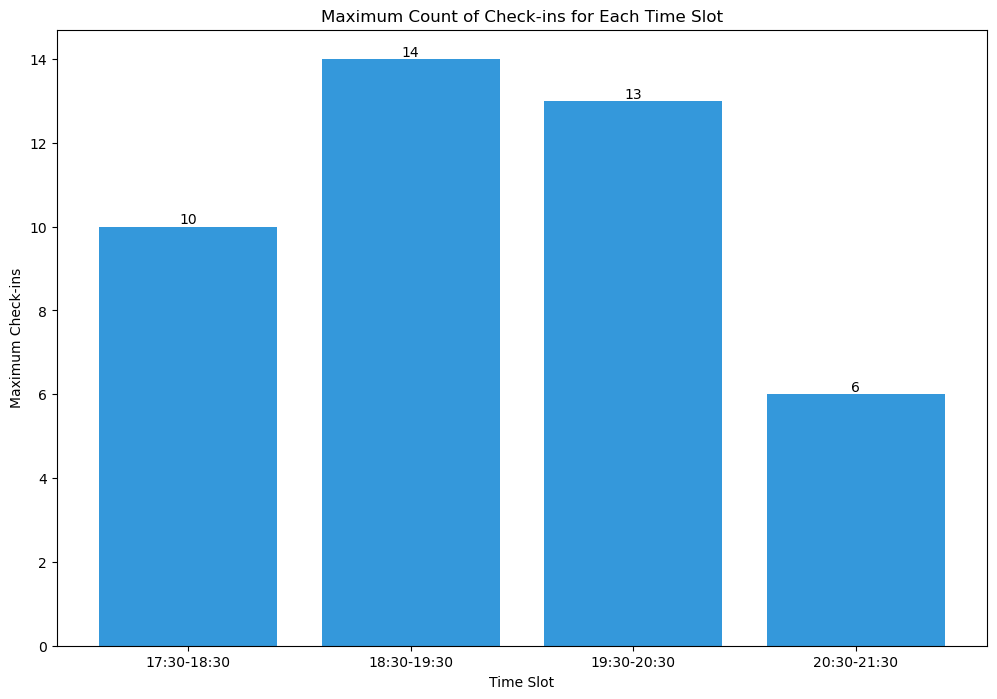

In [34]:
max_checkins_per_slot = checkin_counts_pivoted.max()

# Plot a bar chart for the maximum count of check-ins for each time slot
plt.figure(figsize=(12, 8))
bars = plt.bar(max_checkins_per_slot.index, max_checkins_per_slot, color='#3498db')  # Use a professional blue color

# Display the number on the bars
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval, round(yval, 2), ha='center', va='bottom')

plt.title('Maximum Count of Check-ins for Each Time Slot')
plt.xlabel('Time Slot')
plt.ylabel('Maximum Check-ins')
plt.xticks(rotation=0)  # Rotate x-axis labels horizontally
plt.show()

In [51]:
checkin_counts_pivoted['Date'] = pd.to_datetime(checkin_counts_pivoted.index)
checkin_counts_pivoted['Weekday'] = checkin_counts_pivoted['Date'].dt.day_name()

# Group by 'Weekday' and get the maximum values for each slot
max_checkin_by_day = checkin_counts_pivoted.groupby('Weekday').max().iloc[:, 0:]

In [52]:
max_checkin_by_day

Slot,17:30-18:30,18:30-19:30,19:30-20:30,20:30-21:30,Date
Weekday,,,,,
Friday,7,12,13,6,2010-06-11
Monday,9,12,8,4,2010-06-07
Saturday,1,12,11,6,2010-06-05
Sunday,1,10,8,5,2010-06-06
Thursday,6,14,12,1,2010-06-10
Tuesday,10,12,8,0,2010-06-08
Wednesday,6,11,10,0,2010-06-09


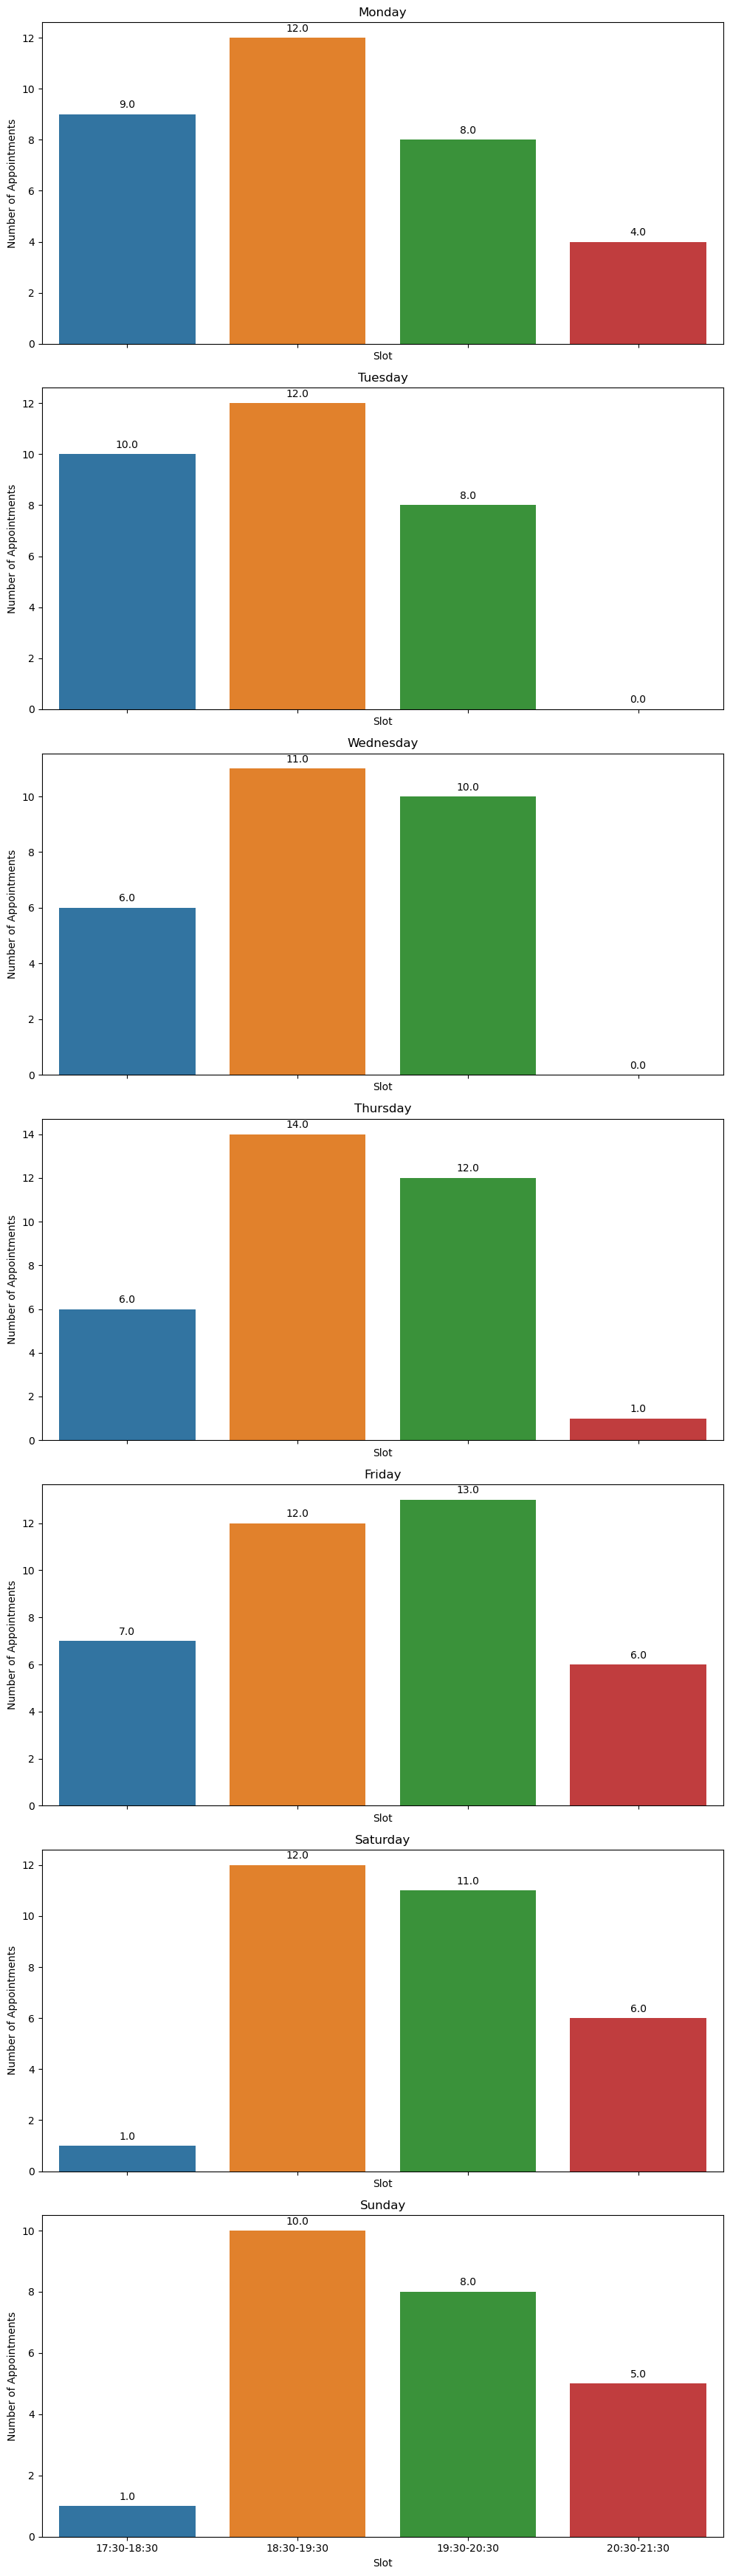

In [53]:
max_checkin_by_day_reset = max_checkin_by_day.reset_index()

# Sort the DataFrame to start with Monday
ordered_days = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]
max_checkin_by_day_ordered = max_checkin_by_day_reset.set_index('Weekday').loc[ordered_days].reset_index()

# Set up the matplotlib figure with 7 subplots (one for each day of the week)
fig, axes = plt.subplots(nrows=7, ncols=1, figsize=(10, 35), sharex=True)

# Iterate over the DataFrame rows
for i, row in max_checkin_by_day_ordered.iterrows():
    # Plot each row's values against the column names, excluding the 'Weekday' and 'Date' columns
    ax = sns.barplot(ax=axes[i], x=max_checkin_by_day_ordered.columns[1:-1], y=row[1:-1])
    axes[i].set_title(f'{row["Weekday"]}')
    axes[i].set_ylabel('Number of Appointments')
    
    # Annotate each bar with its value
    for p in ax.patches:
        ax.annotate(format(p.get_height(), '.1f'), 
                    (p.get_x() + p.get_width() / 2., p.get_height()), 
                    ha = 'center', va = 'center', 
                    xytext = (0, 9), 
                    textcoords = 'offset points')

plt.tight_layout()
plt.show()

In [54]:
time_slots = ['17:30-18:30', '18:30-19:30', '19:30-20:30', '20:30-21:30']
for slot in time_slots:
    max_checkin_by_day[slot] = np.ceil(max_checkin_by_day[slot] / 4)

# Sort the index to start the week at Monday
sorted_days = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
max_checkin_by_day = max_checkin_by_day.loc[sorted_days]

# Generate a bar plot for each weekday
for day in sorted_days:
    fig = go.Figure()
    for slot in time_slots:
        fig.add_trace(go.Bar(
            x=[slot],
            y=[max_checkin_by_day.loc[day, slot]],
            name=slot,
            text=[max_checkin_by_day.loc[day, slot]],
            textposition='auto'
        ))
    fig.update_layout(
        title=f'Number of Physicians Required on {day}',
        xaxis_title='Time Slot',
        yaxis_title='Number of Physicians',
        yaxis=dict(type='linear'),
        legend_title='<b>Time Slots</b>',width=600,  # Set the width of the figure
        height=600
    )
    fig.show()

- The visuals indicate a maximum allocation of **3** physicians for the **17:30-18:30**
- **4** allocations can be needed for **18:30-19:30** slot as well as for the **19:30-20:30** slots. 
- Approximately 2 physicians can be  assigned to the **20:30-21:30** slots.


Therefore, we can clearly see that total doctors required on any particular day differs. This can be further analysed to verfiy the seasonal effect on allocation.

## Case 2: Effectiveness

In order to check the steps involved, we will perform the following steps:

#### STEPS
1. Remove the subset of Patient_ID and Appointment_Date from the data 'final_apt' since the patient might have called several time on a particular date.
2. create a fucntion to check the conditions where for Patient_ID , and Show_Code =='Y' , the apppointment date is greater than seven. Note than in our condition we have did the opposite and hence found out effectiveness by using "NOT".
3. Display the value

In [36]:
# Drop duplicates based on 'PATIENT_ID' and 'APPOINTMENT_DATE'
unique_after_hours_calls = final_apt.drop_duplicates(subset=['PATIENT_ID', 'APPOINTMENT_DATE'])

In [37]:
unique_after_hours_calls

,FACILITY,DEPARTMENT,PROVIDER_ID,APPOINTMENT_DATE,APPOINTMENT_TIME,PATIENT_ID,APPOINTMENT_TYPE,BOOKING_DATE,BOOKING_TIME,SHOW_CODE,CHECKIN_DATE,CHECKIN_TIME,Hour,Date,Slot
49,SCH,MED,92430939,2010-05-06,2010-05-06 18:50:00,51101,Telephone Visit,2010-05-06,17:50:00,Y,2010-05-06,18:50:00,18,2010-05-06,18:30-19:30
111,SCH,MED,39655693,2010-05-24,2010-05-24 17:50:00,101005,Telephone Visit,2010-05-24,17:05:00,Y,2010-05-24,17:50:00,17,2010-05-24,17:30-18:30
134,SCH,MED,38782013,2010-03-18,2010-03-18 17:50:00,130521,Telephone Visit,2010-03-18,16:45:00,Y,2010-03-18,16:58:00,17,2010-03-18,17:30-18:30
135,SCH,MED,57772125,2010-05-06,2010-05-06 19:00:00,130521,Telephone Visit,2010-05-06,17:59:00,Y,2010-05-06,19:00:00,19,2010-05-06,19:30-20:30
234,SCH,MED,80416718,2010-01-18,2010-01-18 17:50:00,200735,Telephone Visit,2010-01-18,16:17:00,Y,2010-01-18,17:06:00,17,2010-01-18,17:30-18:30
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
124962,SCH,MED,68196216,2010-02-07,2010-02-07 19:40:00,99911346,Telephone Visit,2010-02-07,16:53:00,Y,2010-02-07,19:40:00,19,2010-02-07,19:30-20:30
124989,SCH,MED,38782013,2009-12-27,2009-12-27 20:00:00,99940946,Telephone Visit,2009-12-27,17:03:00,Y,2009-12-27,20:00:00,20,2009-12-27,20:30-21:30
125030,SCH,MED,22764222,2010-05-31,2010-05-31 19:20:00,99981322,Telephone Visit,2010-05-31,18:25:00,Y,2010-05-31,19:20:00,19,2010-05-31,19:30-20:30
125031,SCH,MED,23066332,2010-03-08,2010-03-08 18:40:00,99981322,Telephone Visit,2010-03-08,18:33:00,Y,2010-03-08,18:40:00,18,2010-03-08,18:30-19:30


We can observe that the originial data with 4075 entries dropped to 4058 indicating 17 cases where duplicates were found

In [38]:


# Defining a function to check the conditions for effectiveness
def is_effective(row):
    conditions = (
        (final_apt['PATIENT_ID'] == row['PATIENT_ID']) &
        (final_apt['APPOINTMENT_TYPE'] == 'Telephone Visit') &
        (final_apt['SHOW_CODE'] == 'Y') &
        (final_apt['APPOINTMENT_TIME'] >= row['APPOINTMENT_TIME']) &
        (final_apt['APPOINTMENT_TIME'] <= row['APPOINTMENT_TIME'] + timedelta(days=7))
    )
    return not final_apt[conditions].empty

# Applying the function to each row and get effectiveness status
effective_calls = unique_after_hours_calls.apply(is_effective, axis=1)

# Calculate effectiveness ratio
effectiveness_ratio = effective_calls.sum() / len(effective_calls)
print(f"Effectiveness ratio of after-hours telephone appointments: {effectiveness_ratio:.2%}")

Effectiveness ratio of after-hours telephone appointments: 80.34%


In order to display the number of cases in each type we can use the following graphs

In [39]:
effectiveness_data = pd.DataFrame({'Effectiveness': effective_calls})

# Create a new column based on 'Effectiveness'
effectiveness_data['Label'] = effectiveness_data['Effectiveness'].map({True: 'Effective', False: 'Ineffective'})

# Count the occurrences of each category
counts = effectiveness_data['Label'].value_counts()

fig = px.pie(names=counts.index, values=counts.values, labels=counts.index,
             title='Effectiveness of Telephone Appointments',
             template='plotly_white', hole=0.4, custom_data=[counts.values],
             color_discrete_map={'Effective': 'green', 'Ineffective': 'red'})

fig.update_traces(texttemplate='%{percent:.1%} <br>(%{customdata[0]} appointments)',
                  hoverinfo='label+percent+value', 
                  insidetextorientation='radial')  # Displaying text outside pie area

fig.update_layout(legend_title_text='Effectiveness',
                  width=500, height=400)

fig.show()

Within this refined dataset, around **3,260** cases were identified as effective, showcasing a notable **80.34%** overall program effectiveness, reinforcing the success of scheduled appointments.


## Case 2: Realistic Approach

Carrying out the same steps but with final_checkin data 

In [40]:
unique_after_hours_calls = final_checkin.drop_duplicates(subset=['PATIENT_ID', 'APPOINTMENT_DATE'])

# Define a function to check the conditions for effectiveness
def is_effective(row):
    conditions = (
        (final_checkin['PATIENT_ID'] == row['PATIENT_ID']) &
        (final_checkin['APPOINTMENT_TYPE'] == 'Telephone Visit') &
        (final_checkin['SHOW_CODE'] == 'Y') &
        (final_checkin['CHECKIN_DATETIME'] >= row['APPOINTMENT_TIME']) &
        (final_checkin['CHECKIN_DATETIME'] <= row['APPOINTMENT_TIME'] + timedelta(days=7))
    )
    return not final_checkin[conditions].empty

# Apply the function to each row and get effectiveness status
effective_calls = unique_after_hours_calls.apply(is_effective, axis=1)

# Calculate effectiveness ratio
effectiveness_ratio = effective_calls.sum() / len(effective_calls)
print(f"Effectiveness ratio of after-hours telephone appointments: {effectiveness_ratio:.2%}")

Effectiveness ratio of after-hours telephone appointments: 90.42%


In [41]:
effectiveness_data_checkin = pd.DataFrame({'Effectiveness': effective_calls})

# Create a new column based on 'Effectiveness'
effectiveness_data_checkin['Label'] = effectiveness_data_checkin['Effectiveness'].map({True: 'Effective', False: 'Ineffective'})

# Count the occurrences of each category
counts = effectiveness_data_checkin['Label'].value_counts()

fig = px.pie(names=counts.index, values=counts.values, labels=counts.index,
             title='Effectiveness of Telephone Check-In',
             template='plotly_white', hole=0.4, custom_data=[counts.values],
             color_discrete_map={'Effective': 'green', 'Ineffective': 'red'})

fig.update_traces(texttemplate='%{percent:.1%} <br>(%{customdata[0]} appointments)',
                  hoverinfo='label+percent+value', 
                  insidetextorientation='radial')  # Displaying text outside pie area

fig.update_layout(legend_title_text='Effectiveness',
                  width=500, height=400)

fig.show()

- Out of 4,058 case studies, only 2,995 cases showed up to the appointment, indicating an attendance rate of approximately 73.87%
- Among the attendees, about 2,708 cases were deemed effective, contributing significantly to the program's overall effectiveness at 90.42%.
- Our findings highlight the program's robust performance, with only 287 cases requiring attention due to appointments made within 7 days among the observed 2995 unique case studies.


## Case 3 : Improving the efficiency

Considering the realistic approach of the previous case, we will further proceed with the following steps

In [42]:
# Segregate Effective and Ineffective records
effective_records = unique_after_hours_calls[effective_calls]
ineffective_records = unique_after_hours_calls[~effective_calls]

In [43]:
effective_records

,FACILITY,DEPARTMENT,PROVIDER_ID,APPOINTMENT_DATE,APPOINTMENT_TIME,PATIENT_ID,APPOINTMENT_TYPE,BOOKING_DATE,BOOKING_TIME,SHOW_CODE,CHECKIN_DATE,CHECKIN_TIME,CHECKIN_DATETIME,Hour,Date,Slot
49,SCH,MED,92430939,2010-05-06,2010-05-06 18:50:00,51101,Telephone Visit,2010-05-06,17:50:00,Y,2010-05-06,NaT,2010-05-06 18:50:00,18,2010-05-06,18:30-19:30
111,SCH,MED,39655693,2010-05-24,2010-05-24 17:50:00,101005,Telephone Visit,2010-05-24,17:05:00,Y,2010-05-24,NaT,2010-05-24 17:50:00,17,2010-05-24,17:30-18:30
135,SCH,MED,57772125,2010-05-06,2010-05-06 19:00:00,130521,Telephone Visit,2010-05-06,17:59:00,Y,2010-05-06,NaT,2010-05-06 19:00:00,19,2010-05-06,19:30-20:30
252,SCH,MED,53083615,2010-01-07,2010-01-07 19:30:00,220610,Telephone Visit,2010-01-07,17:56:00,Y,2010-01-07,NaT,2010-01-07 19:30:00,19,2010-01-07,19:30-20:30
269,SCH,MED,99420159,2010-02-15,2010-02-15 18:10:00,230729,Telephone Visit,2010-02-15,17:16:00,Y,2010-02-15,NaT,2010-02-15 18:10:00,18,2010-02-15,18:30-19:30
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
124962,SCH,MED,68196216,2010-02-07,2010-02-07 19:40:00,99911346,Telephone Visit,2010-02-07,16:53:00,Y,2010-02-07,NaT,2010-02-07 19:40:00,19,2010-02-07,19:30-20:30
124989,SCH,MED,38782013,2009-12-27,2009-12-27 20:00:00,99940946,Telephone Visit,2009-12-27,17:03:00,Y,2009-12-27,NaT,2009-12-27 20:00:00,20,2009-12-27,20:30-21:30
125030,SCH,MED,22764222,2010-05-31,2010-05-31 19:20:00,99981322,Telephone Visit,2010-05-31,18:25:00,Y,2010-05-31,NaT,2010-05-31 19:20:00,19,2010-05-31,19:30-20:30
125031,SCH,MED,23066332,2010-03-08,2010-03-08 18:40:00,99981322,Telephone Visit,2010-03-08,18:33:00,Y,2010-03-08,NaT,2010-03-08 18:40:00,18,2010-03-08,18:30-19:30


In [44]:
ineffective_records

,FACILITY,DEPARTMENT,PROVIDER_ID,APPOINTMENT_DATE,APPOINTMENT_TIME,PATIENT_ID,APPOINTMENT_TYPE,BOOKING_DATE,BOOKING_TIME,SHOW_CODE,CHECKIN_DATE,CHECKIN_TIME,CHECKIN_DATETIME,Hour,Date,Slot
366,SCH,MED,38351123,2009-12-15,2009-12-15 18:10:00,311283,Telephone Visit,2009-12-15,17:26:00,Y,2009-12-15,NaT,2009-12-15 17:31:00,17,2009-12-15,17:30-18:30
431,SCH,MED,64646396,2010-06-07,2010-06-07 18:50:00,361365,Telephone Visit,2010-06-07,17:46:00,Y,2010-06-07,NaT,2010-06-07 17:50:00,17,2010-06-07,17:30-18:30
1332,SCH,MED,27602442,2010-06-04,2010-06-04 19:20:00,1071036,Telephone Visit,2010-06-04,19:02:00,Y,2010-06-04,NaT,2010-06-04 19:04:00,19,2010-06-04,19:30-20:30
1835,SCH,MED,54427475,2010-01-24,2010-01-24 18:40:00,1530525,Telephone Visit,2010-01-24,17:48:00,Y,2010-01-24,NaT,2010-01-24 18:05:00,18,2010-01-24,18:30-19:30
1970,SCH,MED,38782013,2010-03-18,2010-03-18 18:20:00,1620954,Telephone Visit,2010-03-18,17:37:00,Y,2010-03-18,NaT,2010-03-18 17:38:00,17,2010-03-18,17:30-18:30
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
123105,SCH,MED,75512367,2010-03-22,2010-03-22 19:00:00,98450436,Telephone Visit,2010-03-22,17:47:00,Y,2010-03-22,NaT,2010-03-22 17:50:00,17,2010-03-22,17:30-18:30
123132,SCH,MED,39560883,2010-01-14,2010-01-14 19:30:00,98470906,Telephone Visit,2010-01-14,18:55:00,Y,2010-01-14,NaT,2010-01-14 18:58:00,18,2010-01-14,18:30-19:30
123360,SCH,MED,94752289,2010-03-08,2010-03-08 18:40:00,98640857,Telephone Visit,2010-03-08,17:50:00,Y,2010-03-08,NaT,2010-03-08 18:04:00,18,2010-03-08,18:30-19:30
123640,SCH,MED,54427475,2010-01-05,2010-01-05 17:50:00,98840828,Telephone Visit,2010-01-05,17:28:00,Y,2010-01-05,NaT,2010-01-05 17:40:00,17,2010-01-05,17:30-18:30


In [45]:
copied_effective_records = effective_records.copy()

# Convert 'PROVIDER_ID' to string in the copied DataFrame
copied_effective_records['PROVIDER_ID'] = copied_effective_records['PROVIDER_ID'].astype(str)

# Get the top 5 doctors with the count of unique effective cases
top_5_effective_doctors_count = copied_effective_records['PROVIDER_ID'].value_counts().nlargest(5)

# Create a horizontal bar chart for top 5 effective doctors with counts displayed inside the bars
fig = px.bar(top_5_effective_doctors_count, y=top_5_effective_doctors_count.index, x='PROVIDER_ID',
             orientation='h', 
             title='Top 5 Doctors by Count of Unique Effective Cases',
             labels={'PROVIDER_ID': 'Count', 'index': 'Doctor ID'},
             text=top_5_effective_doctors_count.values,  # Display counts inside bars
             color=top_5_effective_doctors_count.index,   # Color by doctor ID
             color_discrete_sequence=px.colors.qualitative.Dark2[::-1],  # Use the Dark2 color palette in reverse order
             category_orders={'PROVIDER_ID': top_5_effective_doctors_count.index},  # Order by count

             # Layout adjustments
             width=600, height=400)

# Display the chart
fig.show()

From these data we can the top 5 physicians with higheste effective rate .

Further, from their ID , we can check whether there are ineffective records of them. if so, how many? 
- By doing so , goal is to strategically assign physicians with higher efficiency to time slots where ineffectiveness tends to occur more frequently.

In [46]:
top_5_effective=effective_records['PROVIDER_ID'].value_counts().nlargest(5).index

In [47]:
doctors_in_both = top_5_effective[top_5_effective.isin(ineffective_records['PROVIDER_ID'].unique())]

In [48]:
ineffective_records_for_both = ineffective_records[ineffective_records['PROVIDER_ID'].isin(doctors_in_both)]

# Convert the Index to str for display
doctors_in_both_str = doctors_in_both.astype(str)

# Count the occurrences of each doctor in the ineffective records
ineffective_count_for_both = ineffective_records_for_both['PROVIDER_ID'].astype(str).value_counts()

# Define custom colors for gold and green
custom_colors = ['gold', 'green']

# Create a horizontal bar chart for the count of ineffective records for each doctor in both top 5 effective and ineffective records
fig_ineffective_count_for_both = px.bar(ineffective_count_for_both, 
                                        y=ineffective_count_for_both.index, 
                                        x='PROVIDER_ID',
                                        title='Count of Ineffective Records for Doctors in Both',
                                        labels={'PROVIDER_ID': 'Count', 'index': 'Physician_ID'},
                                        text=ineffective_count_for_both.values,  # Display counts on top of bars
                                        color=ineffective_count_for_both.index,   # Color by doctor ID
                                        color_discrete_sequence=custom_colors,  # Use gold and green colors
                                        category_orders={'PROVIDER_ID': ineffective_count_for_both.index},  # Order by count

                                        # Layout adjustments
                                        width=600, height=400)

# Display the chart
fig_ineffective_count_for_both.show()



- The doctor with ID '42133974' handled 123 cases, with only 1 case identified as ineffective.This signifies he has high effectiveness rank. We can thus assess the performance of each physician using this approach.
- To enhance overall efficiency, doctors can be ranked based on their performance. The goal is to strategically assign physicians with higher efficiency to time slots where ineffectiveness tends to occur more frequently.


One more approach is to find the physicians with most ineffective records and allocate them less frequently. For instance, lets look at example

In [49]:
top_5_physicians = ineffective_records['PROVIDER_ID'].value_counts().head(5)


print("Top 5 Physicians in Ineffective Records and their Value Counts:")
print(top_5_physicians)

Top 5 Physicians in Ineffective Records and their Value Counts:
54427475    23
27602442    21
24402122    19
729290      19
80207838    17
Name: PROVIDER_ID, dtype: int64


In [50]:
top_5_physicians.index = top_5_physicians.index.astype(str)

# custom colors for the chart
custom_colors = ['rgb(0, 102, 204)', 'rgb(255, 127, 14)', 'rgb(44, 160, 44)', 'rgb(214, 39, 40)', 'rgb(148, 103, 189)']



fig = px.bar(top_5_physicians, 
             x='PROVIDER_ID', 
             y=top_5_physicians.index,
             orientation='h',
             labels={'PROVIDER_ID': 'Provider ID', 'index': 'Physician ID'},
             title='Top 5 Physicians in Ineffective Records and Their Value Counts',
             color=top_5_physicians.index,  # Color by physician (Provider ID)
             color_discrete_sequence=custom_colors,  # Use custom colors
             category_orders={'PROVIDER_ID': top_5_physicians.index},  # Order by value count
             text=top_5_physicians.values,  # Display value counts as text labels
             width=600, height=400)


fig.show()

Here we can check out the '54427475' common slot timings and hence allocate a different physician who is more effective. 

We can further allocate the physician with ID '54427475' to attend More In-Person visits if proven from the data to be effective by doing so.

By doing so ,considering their historically ineffective hours, careful scheduling adjustments can be made to minimize ineffectiveness and enhance overall productivity.

## Conclusion:

**Physician Staffing for After-Hours Clinic:**
- On average, 4 physicians are needed, considering actual patient attendance during after-hours (5:30 pm onwards).
- The allocation varies by time slot, with a maximum of 3-4 physicians needed during peak hours.

**Effectiveness of Telephone Appointments:**
- The telephone appointments are quite effective with an 80.34% success rate, meaning most do not require follow-up within 7 days.
- When considering actual attendance, the effectiveness increases to 90.42%.

**Suggestions for Improvement:**
- Assign high-performing physicians to time slots with higher rates of ineffective appointments to boost overall effectiveness.
- Reallocate physicians with higher rates of ineffective telephone appointments to in-person visits or other roles where they may be more effective.
